In [1]:
# import modules
import numpy as np
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import os

In [55]:
current_directory = os.getcwd()
print(current_directory)

BATCH_SIZE = 32
IMAGE_SIZE = (256,256)
EPOCHS = 20

/Users/bhargobdeka/Desktop/Projects/houseplant-healthy/Training


In [7]:
dataset = tf.keras.preprocessing.image_dataset_from_directory("../houseplant_images",
    batch_size=BATCH_SIZE,
    image_size=IMAGE_SIZE,
    shuffle=True)

Found 904 files belonging to 2 classes.


In [47]:
class_names = dataset.class_names
class_names
dataset.shape

AttributeError: 'BatchDataset' object has no attribute 'batch_size'

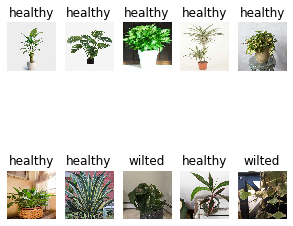

In [31]:
plt.figure(figsize=(5,5)) # figure size for better visualization
for image_batch, label_batch in dataset.take(1):
    
    for i in range(10):
        ax = plt.subplot(2,5,i+1) # increment subplot index i
        plt.imshow(image_batch[i].numpy().astype("uint8")) # need to change the data type
        plt.axis("off")
        plt.title(class_names[label_batch[i].numpy()])

In [34]:
## function for train-val-test-split
def train_val_test_split_tf(dataset, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    # shuffle data before splitting
    if shuffle:
        dataset = dataset.shuffle(shuffle_size)
    
    train_size = int(len(dataset)*0.8)
    train_data = dataset.take(train_size)
    
    rem_data   = dataset.skip(train_size)
    
    val_size   = int(len(dataset)*val_split)
    val_data   = rem_data.take(val_size)
    
    test_data  = rem_data.skip(val_size)
    
    return train_data, val_data, test_data

    
    
    

In [35]:
train_data, val_data, test_data = train_val_test_split_tf(dataset)

In [38]:
len(test_data)

4

In [51]:
# caching and fetching (mainly for optimizing our models)
train_data.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE) 
val_data.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE) 
test_data.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE) 

<PrefetchDataset shapes: ((None, 256, 256, 3), (None,)), types: (tf.float32, tf.int32)>

In [49]:
# resizing if some inputs do not conform to the dataset image size
# rescaling to get values between 0 and 1

resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [50]:
# Data Augmentation -- generate new data by rotating or flipping images
data_augmentation = tf.keras.Sequential([
   layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2),
])

In [43]:
len(class_names)

2

In [52]:
# Building the Model
BATCH_SIZE = 32
CHANNELS   = 3
IMAGE_SIZE = 256
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 2
model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(32, (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(32, (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(32, (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(32, (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(32, (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)

In [53]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_5 (Sequential)    (32, 256, 256, 3)         0         
_________________________________________________________________
sequential_6 (Sequential)    (32, 256, 256, 3)         0         
_________________________________________________________________
conv2d_18 (Conv2D)           (32, 254, 254, 32)        896       
_________________________________________________________________
max_pooling2d_18 (MaxPooling (32, 127, 127, 32)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (32, 125, 125, 32)        9248      
_________________________________________________________________
max_pooling2d_19 (MaxPooling (32, 62, 62, 32)          0         
_________________________________________________________________
conv2d_20 (Conv2D)           (32, 60, 60, 32)         

In [54]:
# Compiler
model.compile(
optimizer='adam',
loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
metrics=['accuracy']
)

In [56]:
# Model Fit
history = model.fit(
train_data,
epochs=EPOCHS,
batch_size=BATCH_SIZE,
verbose=1,
validation_data=val_data
)

Epoch 1/20
23/23 [==============================] - 53s 2s/step - loss: 0.6861 - accuracy: 0.5393 - val_loss: 0.7444 - val_accuracy: 0.4000
Epoch 2/20
23/23 [==============================] - 48s 2s/step - loss: 0.6799 - accuracy: 0.5295 - val_loss: 0.7742 - val_accuracy: 0.4375
Epoch 3/20
23/23 [==============================] - 48s 2s/step - loss: 0.6715 - accuracy: 0.5913 - val_loss: 0.6431 - val_accuracy: 0.6875
Epoch 4/20
23/23 [==============================] - 51s 2s/step - loss: 0.6308 - accuracy: 0.6629 - val_loss: 0.6403 - val_accuracy: 0.6719
Epoch 5/20
23/23 [==============================] - 47s 2s/step - loss: 0.5764 - accuracy: 0.7121 - val_loss: 0.5350 - val_accuracy: 0.7812
Epoch 6/20
23/23 [==============================] - 47s 2s/step - loss: 0.5839 - accuracy: 0.6980 - val_loss: 0.5173 - val_accuracy: 0.7500
Epoch 7/20
23/23 [==============================] - 46s 2s/step - loss: 0.6417 - accuracy: 0.6320 - val_loss: 0.5644 - val_accuracy: 0.7656
Epoch 8/20
23/23 [==

In [57]:
# test dataset
scores = model.evaluate(test_data)
history.params
history.history.keys

acc     = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss     = history.history['loss']
val_loss = history.history['val_loss']

4/4 [==============================] - 12s 299ms/step - loss: 0.4838 - accuracy: 0.7969


Text(0.5, 1.0, 'Training and Validation Accuracy')

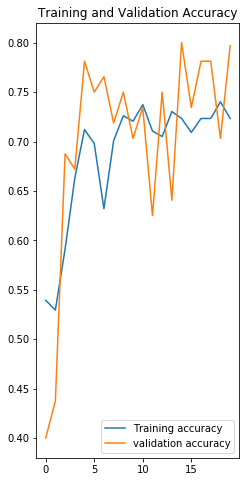

In [58]:
# Learning curve
plt.figure(figsize=(8,8))
plt.subplot(1,2,1),
plt.plot(range(EPOCHS), acc, label='Training accuracy')
plt.plot(range(EPOCHS), val_acc, label='validation accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

first image to predict
first image's actual label: wilted


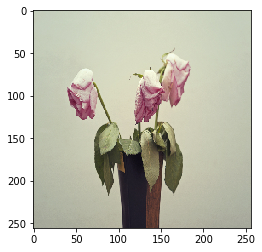

In [59]:
for images_batch, labels_batch in test_data.take(1):
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("first image's actual label:",class_names[first_label])
    

In [60]:
batch_prediction = model.predict(images_batch)
print("first image's predicted label:",class_names[np.argmax(batch_prediction[0])])

first image's predicted label: wilted


In [61]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy()) # images to array
    img_array = tf.expand_dims(img_array, 0) # create a batch
    
    predictions = model.predict(img_array)
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100*(np.max(predictions[0])),2)
    
    return predicted_class, confidence
    

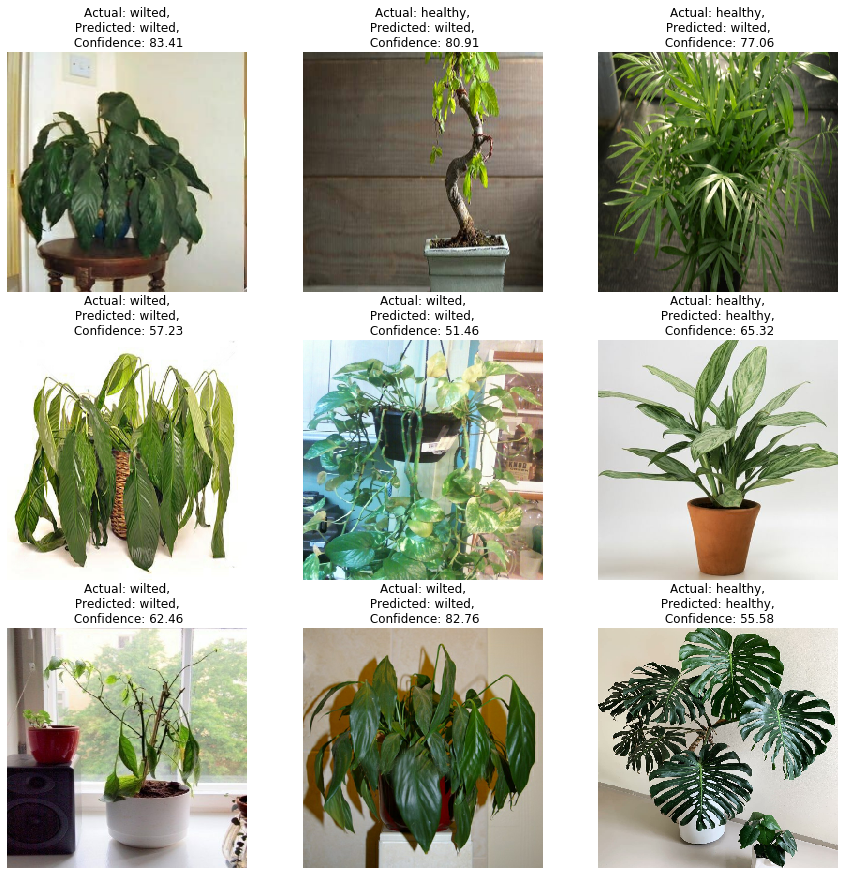

In [62]:
plt.figure(figsize=(15,15))
for images, labels in test_data.take(1):
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))

        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]

        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}, \n Confidence: {confidence}")
        plt.axis("off")

In [63]:
model_version = 1
model.save(f"../model_saved/{model_version}") # python string 

INFO:tensorflow:Assets written to: ../model_saved/1/assets
